In [1]:
# !pip install grape

In [2]:
from grape.datasets.kghub import KGIDG
import pandas as pd
from grape.edge_prediction import edge_prediction_evaluation
from grape.edge_prediction import PerceptronEdgePrediction
from grape.embedders import FirstOrderLINEEnsmallen, SecondOrderLINEEnsmallen
from grape.embedders import DeepWalkCBOWEnsmallen, DeepWalkSkipGramEnsmallen
from grape.embedders import WalkletsCBOWEnsmallen, WalkletsSkipGramEnsmallen

/Users/jtr4v/PythonProject/dans_kg_idg/venv/lib/python3.11/site-packages/ensmallen/__init__.py:22: UserWarning: Ensmallen is compiled for the Intel Haswell architecture (2013).On the current machine, the flags '['avx2', 'bmi2', 'popcnt']' are required but '{'avx2', 'bmi2'}' are not available.
The library will use a slower but more compatible version (Intel Core2 2006).
  warnings.warn(


In [3]:
g = KGIDG(version='20230601')
main_component = g.remove_components(top_k_components=1)
dense_main_component = main_component.remove_dendritic_trees()
drug_types = ["biolink:ChemicalSubstance", "biolink:ChemicalEntity", "biolink:Drug"]
protein_types = ["biolink:Protein"]
minority_edge_type = 'minority_edge'
dense_main_component.replace_edge_type_name_from_edge_node_type_names_inplace(
    edge_type_name=minority_edge_type,
    source_node_type_names=drug_types,
    destination_node_type_names=protein_types
)
dense_main_component

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>KGIDG</h2><p class="paragraph">The undirected multigraph KGIDG has 239.46K heterogeneous nodes and 1.01M heterogeneous edges. The graph is connected, that is, it is composed of a single connected component that includes all nodes and edges. The RAM requirements for the nodes and edges data structures are 28.57MB and 9.97MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 2, the maximum node degree is 9.36K, the mode degree is 2, the mean degree is 8.41 and the node degree median is 4.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='http://amigo.geneontology.org/amigo/term/GO:0065007' target='_blank' title='Go to Gene Ontology to get more informations about GO:0065007'>GO:0065007</a> (degree 9.36K and node types <a href='https://biolink.github.io/biolink-model/docs/BiologicalProcess.html' target='_blank' title='Go to BioLink to get more informations about biolink:BiologicalProcess'>biolink:BiologicalProcess</a> and <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:24995' target='_blank' title='Go to CHEBI to get more informations about CHEBI:24995'>CHEBI:24995</a> (degree 7.34K and node type <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance'>biolink:ChemicalSubstance</a>), <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:52898' target='_blank' title='Go to CHEBI to get more informations about CHEBI:52898'>CHEBI:52898</a> (degree 7.26K and node type <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance'>biolink:ChemicalSubstance</a>), <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:30616' target='_blank' title='Go to CHEBI to get more informations about CHEBI:30616'>CHEBI:30616</a> (degree 6.00K and node types <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance'>biolink:ChemicalSubstance</a> and <a href='https://biolink.github.io/biolink-model/docs/ChemicalEntity.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalEntity'>biolink:ChemicalEntity</a>) and <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:456216' target='_blank' title='Go to CHEBI to get more informations about CHEBI:456216'>CHEBI:456216</a> (degree 5.43K and node types <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance'>biolink:ChemicalSubstance</a> and <a

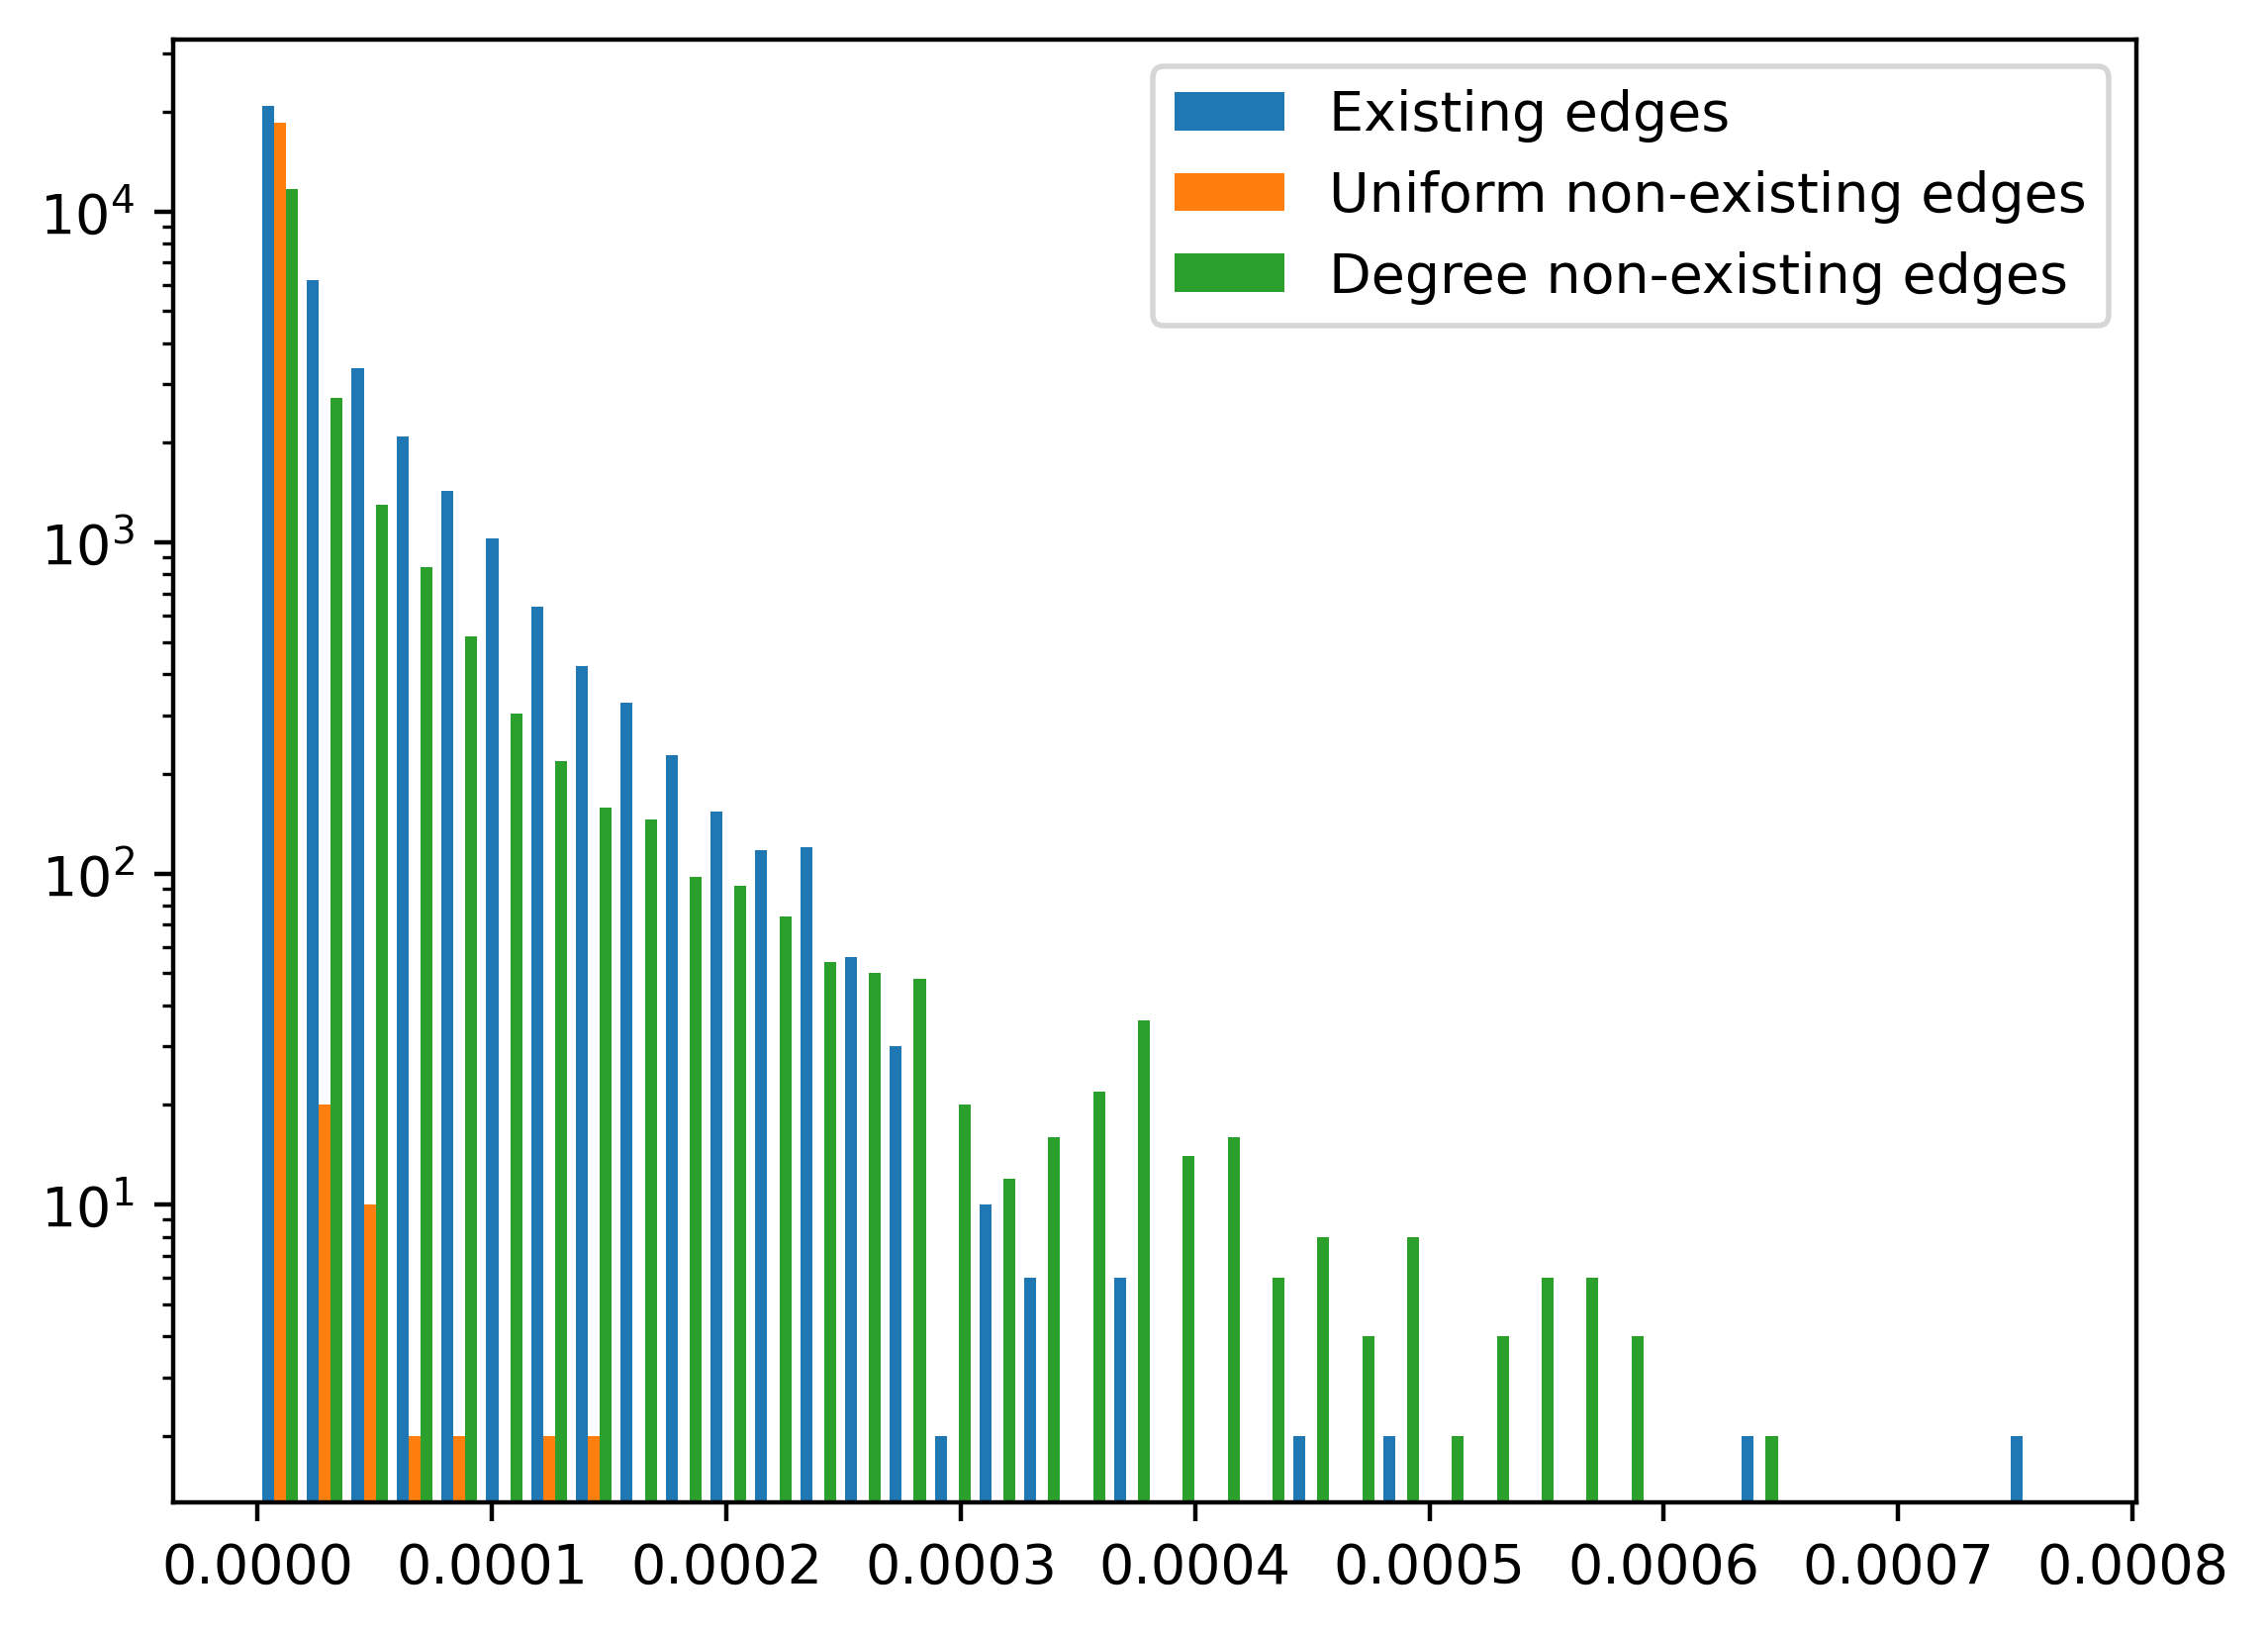

In [4]:
import matplotlib.pyplot as plt
import numpy as np

graph = dense_main_component.filter_from_names(edge_type_names_to_keep=[minority_edge_type])
composite_graph = dense_main_component

negative = graph.sample_negative_graph(
    number_of_negative_samples=graph.get_number_of_edges(),
    use_scale_free_distribution=False,
)

negative_scale_free = graph.sample_negative_graph(
    number_of_negative_samples=graph.get_number_of_edges(),
    use_scale_free_distribution=True,
)

existing_edges_pa = composite_graph.get_preferential_attachment_scores(
    normalize=True,
    subgraph=graph
)
uniform_negative_pa = composite_graph.get_preferential_attachment_scores(
    normalize=True,
    subgraph=negative
)
degree_negative_pa = composite_graph.get_preferential_attachment_scores(
    normalize=True,
    subgraph=negative_scale_free
)


fig, axes = plt.subplots(dpi=400)

plt.hist(
    [
        existing_edges_pa,
        uniform_negative_pa,
        degree_negative_pa
    ],
    log=True,
    bins=40,
    label=[
        "Existing edges",
        "Uniform non-existing edges",
        "Degree non-existing edges"
    ]
)
plt.legend()

In [5]:
# Set smoke test to True for testing:
# SMOKE_TEST = True
NUMBER_OF_HOLDOUTS = 10
VALIDATION_UNBALANCE_RATES = (1.0, )
TRAIN_SIZES = (0.75,)
subgraph = dense_main_component.filter_from_names(
    edge_type_names_to_keep=[minority_edge_type]
)
# Disable the smoke test when you need to run the real thing:
SMOKE_TEST = False
NUMBER_OF_HOLDOUTS = 10
VALIDATION_UNBALANCE_RATES = (1.0, )
TRAIN_SIZES = (0.75,)
results = []
for train_size in TRAIN_SIZES:
    for validation_use_scale_free in (True, False):
        for ModelClass in  [
                FirstOrderLINEEnsmallen,
                SecondOrderLINEEnsmallen,
                DeepWalkCBOWEnsmallen, DeepWalkSkipGramEnsmallen,
                WalkletsCBOWEnsmallen, WalkletsSkipGramEnsmallen,
            ]:
            # If the embedding method involves edge sampling, we train a run
            # using the scale free and one using the uniform.
            if "use_scale_free_distribution" in ModelClass().parameters():
                parameter_sets = [
                    # dict(
                    #     use_scale_free_distribution = True
                    # ),
                    dict(
                        use_scale_free_distribution = False
                    )
                ]
            else:
                parameter_sets = [dict()]
            print(f"train size: {train_size}; validation_use_scale_free: {validation_use_scale_free} ModelClass {ModelClass}")
            for parameter_set in parameter_sets:
                results.append(edge_prediction_evaluation(
                    smoke_test=SMOKE_TEST,
                    holdouts_kwargs=dict(
                        train_size=train_size,
                        edge_types=[minority_edge_type],
                    ),
                    evaluation_schema="Connected Monte Carlo",
                    node_features=ModelClass(**parameter_set),
                    graphs=dense_main_component,
                    models=[
                        PerceptronEdgePrediction(
                            edge_features=None,
                            edge_embeddings="Hadamard",
                            number_of_edges_per_mini_batch=32,
                            use_scale_free_distribution=use_scale_free_distribution
                        )
                        # for use_scale_free_distribution in (True, False)
                        for use_scale_free_distribution in [False]
                    ],
                    enable_cache=True,
                    number_of_holdouts=NUMBER_OF_HOLDOUTS,
                    use_scale_free_distribution=validation_use_scale_free,
                    validation_unbalance_rates=VALIDATION_UNBALANCE_RATES,
                    subgraph_of_interest=subgraph,
                    use_subgraph_as_support=False
                ))
results = pd.concat(results)
results.to_csv("kg_idg_negative_select.tsv",sep="\t")

train size: 0.75; validation_use_scale_free: True ModelClass <class 'embiggen.embedders.ensmallen_embedders.first_order_line.FirstOrderLINEEnsmallen'>
train size: 0.75; validation_use_scale_free: True ModelClass <class 'embiggen.embedders.ensmallen_embedders.second_order_line.SecondOrderLINEEnsmallen'>
train size: 0.75; validation_use_scale_free: True ModelClass <class 'embiggen.embedders.ensmallen_embedders.deepwalk_cbow.DeepWalkCBOWEnsmallen'>
train size: 0.75; validation_use_scale_free: True ModelClass <class 'embiggen.embedders.ensmallen_embedders.deepwalk_skipgram.DeepWalkSkipGramEnsmallen'>
train size: 0.75; validation_use_scale_free: True ModelClass <class 'embiggen.embedders.ensmallen_embedders.walklets_cbow.WalkletsCBOWEnsmallen'>
train size: 0.75; validation_use_scale_free: True ModelClass <class 'embiggen.embedders.ensmallen_embedders.walklets_skipgram.WalkletsSkipGramEnsmallen'>
train size: 0.75; validation_use_scale_free: False ModelClass <class 'embiggen.embedders.ensmall

Evaluating on KGIDG:   0%|                               | 0/10 [00:00<?, ?it/s]

/Users/jtr4v/PythonProject/dans_kg_idg/venv/lib/python3.11/site-packages/embiggen/edge_prediction/edge_prediction_model.py:144: UserWarning: Please do be advised that you have DISABLED the use of scale free sampling for the negative edges for the EVALUATION (not the training) of a model. This is a POOR CHOICE as it will introduce a positive bias as edges sampled uniformely have a significantly different node degree distribution than the positive edges in the graph, and are therefore much easier to predict. The only case where it makes sense to use this parameter is when evaluating how strongly this bias would have affected your task. DO NOT USE THIS CONFIGURATION IN ANY OTHER USE CASE.
  warnings.warn(
/Users/jtr4v/PythonProject/dans_kg_idg/venv/lib/python3.11/site-packages/embiggen/edge_prediction/edge_prediction_model.py:144: UserWarning: Please do be advised that you have DISABLED the use of scale free sampling for the negative edges for the EVALUATION (not the training) of a model.

In [6]:
from glob import glob 
paths = glob("experiments/Ed*/KGIDG/*gz")
paths
import pandas as pd 
df = pd.concat([pd.read_csv(path, index_col=0) for path in paths]).reset_index(drop=True)
df.to_csv("dans_kg_idg_raw_data.csv")
df

,evaluation_mode,train_size,validation_unbalance_rate,use_scale_free_distribution,fall_out,prevalence,negative_likelyhood_ratio,f1_score,fowlkes_mallows_index,precision,...,"('features_parameters', 'stochastic_downsample_by_degree')","('features_parameters', 'normalize_learning_rate_by_degree')","('features_parameters', 'use_scale_free_distribution')","('features_parameters', 'dtype')","('features_parameters', 'verbose')","('features_parameters', 'avoid_false_negatives')","('features_parameters', 'node_embedding_path')","('features_parameters', 'return_weight')","('features_parameters', 'explore_weight')","('features_parameters', 'contextual_node_embedding_path')"
0,train,0.013806,1.0,True,0.433050,0.666667,0.001268,0.901957,0.906265,0.821908,...,False,False,False,f32,True,NaN,NaN,NaN,NaN,NaN
1,test,0.013806,1.0,True,0.424504,0.666667,0.269115,0.821556,0.821876,0.799266,...,False,False,False,f32,True,NaN,NaN,NaN,NaN,NaN
2,train,0.013806,1.0,True,0.503667,0.666667,0.000869,0.887952,0.893540,0.798759,...,False,False,False,f32,True,NaN,NaN,NaN,NaN,NaN
3,test,0.013806,1.0,True,0.502588,0.666667,0.240676,0.825946,0.827524,0.777926,...,False,False,False,f32,True,NaN,NaN,NaN,NaN,NaN
4,train,0.013806,1.0,True,0.526104,0.666667,0.000910,0.883549,0.889562,0.791662,...,False,False,False,f32,True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,test,0.013806,1.0,True,0.699741,0.666667,0.291667,0.806636,0.812113,0.722830,...,False,False,False,f32,True,NaN,NaN,NaN,NaN,NaN
596,train,0.013806,1.0,True,0.827125,0.666667,0.011231,0.827708,0.840034,0.707030,...,False,False,False,f32,True,NaN,NaN,NaN,NaN,NaN
597,test,0.013806,1.0,True,0.821829,0.666667,0.388620,0.794952,0.803552,0.693730,...,False,False,False,f32,True,NaN,NaN,NaN,NaN,NaN
598,train,0.013806,1.0,True,0.836330,0.666667,0.009227,0.826341,0.838903,0.704822,...,False,False,False,f32,True,NaN,NaN,NaN,NaN,NaN


In [7]:
gb = ['evaluation_mode', 'use_scale_free_distribution', 'features_names', "('model_parameters', 'use_scale_free_distribution')",  "('features_parameters', 'use_scale_free_distribution')"]
metrics = ['matthews_correlation_coefficient']
df = df[df["('model_parameters', 'use_scale_free_distribution')"] == False]
df = df[df["('features_parameters', 'use_scale_free_distribution')"] == False]
sf_df = df[[*gb, *metrics]].groupby(gb).agg(['mean', 'std'])
sf_df.to_csv("dans_kg_idg_data.csv")
sf_df

matthews_correlation_coefficient  \
                                                                                                                                                                                                mean   
evaluation_mode use_scale_free_distribution features_names    ('model_parameters', 'use_scale_free_distributi... ('features_parameters', 'use_scale_free_distrib...                                    
test            False                       DeepWalk CBOW     False                                              False                                                                      0.833450   
                                            DeepWalk SkipGram False                                              False                                                                      0.896665   
                                            First-order LINE  False                                              False                                                                      0.911075   
                                            Second-order LINE False                                              False                                                                      0.915201   
                                            Walklets CBOW     False                                              False                                                                      0.921473   
                                            Walklets SkipGram False                                              False                                                                      0.887040   
                True                        DeepWalk CBOW     False                                              False                                                                      0.411648   
                                            DeepWalk SkipGram False                                              False                                                                      0.171205   
                                            First-order LINE  False                                              False                                                                     -0.056651   
                                            Second-order LINE False                                              False                                                                      0.010862   
                                            Walklets CBOW     False                                              False                                                                      0.167737   
                                            Walklets SkipGram False                                              False                                                                      0.228533   
train           False                       DeepWalk CBOW     False                                              False                                                                      0.999353   
                                            DeepWalk SkipGram False                                              False                                                                      0.996195   
                                            First-order LINE  False                                              False                                                                      0.988345   
                                            Second-order LINE False                                              False                                                                      0.983922   
                                            Walklets CBOW     False                                              False                                                                      0.996420   
                                            Walklets SkipGram False                                              False                                              

In [8]:
!pip install seaborn 


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
data = sf_df
data

matthews_correlation_coefficient  \
                                                                                                                                                                                                mean   
evaluation_mode use_scale_free_distribution features_names    ('model_parameters', 'use_scale_free_distributi... ('features_parameters', 'use_scale_free_distrib...                                    
test            False                       DeepWalk CBOW     False                                              False                                                                      0.833450   
                                            DeepWalk SkipGram False                                              False                                                                      0.896665   
                                            First-order LINE  False                                              False                                                                      0.911075   
                                            Second-order LINE False                                              False                                                                      0.915201   
                                            Walklets CBOW     False                                              False                                                                      0.921473   
                                            Walklets SkipGram False                                              False                                                                      0.887040   
                True                        DeepWalk CBOW     False                                              False                                                                      0.411648   
                                            DeepWalk SkipGram False                                              False                                                                      0.171205   
                                            First-order LINE  False                                              False                                                                     -0.056651   
                                            Second-order LINE False                                              False                                                                      0.010862   
                                            Walklets CBOW     False                                              False                                                                      0.167737   
                                            Walklets SkipGram False                                              False                                                                      0.228533   
train           False                       DeepWalk CBOW     False                                              False                                                                      0.999353   
                                            DeepWalk SkipGram False                                              False                                                                      0.996195   
                                            First-order LINE  False                                              False                                                                      0.988345   
                                            Second-order LINE False                                              False                                                                      0.983922   
                                            Walklets CBOW     False                                              False                                                                      0.996420   
                                            Walklets SkipGram False                                              False                                              

In [29]:
new_df = sf_df.reset_index()
new_df

evaluation_mode use_scale_free_distribution     features_names  \
                                                                    
0             test                       False      DeepWalk CBOW   
1             test                       False  DeepWalk SkipGram   
2             test                       False   First-order LINE   
3             test                       False  Second-order LINE   
4             test                       False      Walklets CBOW   
5             test                       False  Walklets SkipGram   
6             test                        True      DeepWalk CBOW   
7             test                        True  DeepWalk SkipGram   
8             test                        True   First-order LINE   
9             test                        True  Second-order LINE   
10            test                        True      Walklets CBOW   
11            test                        True  Walklets SkipGram   
12           train                       False      DeepWalk CBOW   
13           train                       False  DeepWalk SkipGram   
14           train                       False   First-order LINE   
15           train                       False  Second-order LINE   
16           train                       False      Walklets CBOW   
17           train                       False  Walklets SkipGram   
18           train                        True      DeepWalk CBOW   
19           train                        True  DeepWalk SkipGram   
20           train                        True   First-order LINE   
21           train                        True  Second-order LINE   
22           train                        True      Walklets CBOW   
23           train                        True  Walklets SkipGram   

   ('model_parameters', 'use_scale_free_distribution')  \
                                                         
0                                               False    
1                                               False    
2                                               False    
3                                               False    
4                                               False    
5                                               False    
6                                               False    
7                                               False    
8                                               False    
9                                               False    
10                                              False    
11                                              False    
12                                              False    
13                                              False    
14                                              False    
15                                              False    
16                                              False    
17                                              False    
18                                              False    
19                                              False    
20                                              False    
21                                              False    
22                                              False    
23                                              False    

   ('features_parameters', 'use_scale_free_distribution')  \
                                                            
0                                               False       
1                                               False       
2                                               False       
3                                               False       
4                                               False       
5                                               False       
6                                               False       
7                                               False       
8                                               False       
9                           

/var/folders/vc/lfqgrrhn56d9yj5fbxbw6qr00000gt/T/ipykernel_55310/2594564374.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['use_scale_free_distribution'] = data_test['use_scale_free_distribution'].astype(str)
/var/folders/vc/lfqgrrhn56d9yj5fbxbw6qr00000gt/T/ipykernel_55310/2594564374.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['use_scale_free_distribution'] = data_train['use_scale_free_distribution'].astype(str)


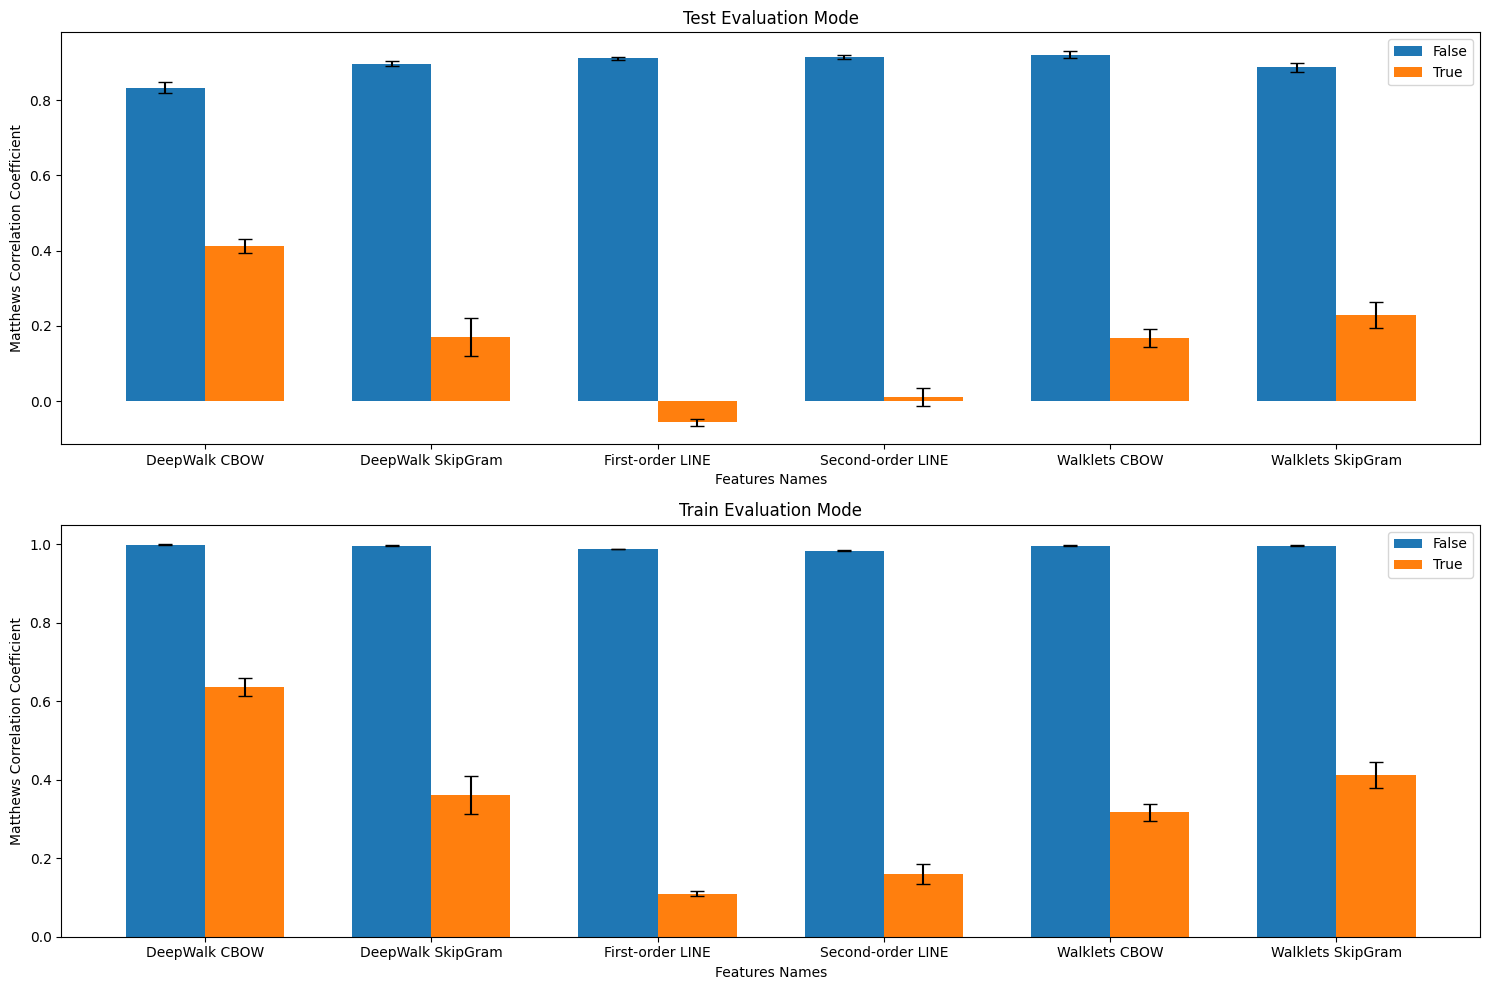

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the data
def plot_data_corrected(df, title, ax):
    # Pivot the data for easier plotting
    pivot_df = df.pivot(index='features_names', columns='use_scale_free_distribution', values=['matthews_correlation_coefficient_mean', 'matthews_correlation_coefficient_std'])
    pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

    # Plotting
    bar_width = 0.35
    index = np.arange(len(pivot_df))

    # Bars for 'False'
    rects1 = ax.bar(index - bar_width/2, pivot_df['matthews_correlation_coefficient_mean_False'], bar_width,
                    yerr=pivot_df['matthews_correlation_coefficient_std_False'], label='False', capsize=5)

    # Bars for 'True'
    rects2 = ax.bar(index + bar_width/2, pivot_df['matthews_correlation_coefficient_mean_True'], bar_width,
                    yerr=pivot_df['matthews_correlation_coefficient_std_True'], label='True', capsize=5)

    ax.set_xlabel('Features Names')
    ax.set_ylabel('Matthews Correlation Coefficient')
    ax.set_title(title)
    ax.set_xticks(index)
    ax.set_xticklabels(pivot_df.index)
    ax.legend()

# Preparing the data
# data_cleaned = pd.read_csv('/path/to/your/data.csv')  # Replace with your file path
data_cleaned = sf_df.reset_index()
# data_cleaned['matthews_correlation_coefficient_mean'] = pd.to_numeric(data_cleaned['matthews_correlation_coefficient_mean'], errors='coerce')
# data_cleaned['matthews_correlation_coefficient_std'] = pd.to_numeric(data_cleaned['matthews_correlation_coefficient_std'], errors='coerce')
data_cleaned['matthews_correlation_coefficient_mean'] = data_cleaned[('matthews_correlation_coefficient', 'mean')]
data_cleaned['matthews_correlation_coefficient_std'] = data_cleaned[('matthews_correlation_coefficient', 'std')]

# Filtering the data for Test and Train modes
data_test = data_cleaned[data_cleaned['evaluation_mode'] == 'test']
data_train = data_cleaned[data_cleaned['evaluation_mode'] == 'train']

# Converting boolean to string for plotting
data_test['use_scale_free_distribution'] = data_test['use_scale_free_distribution'].astype(str)
data_train['use_scale_free_distribution'] = data_train['use_scale_free_distribution'].astype(str)

# Creating figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plotting for Test and Train modes
plot_data_corrected(data_test, 'Test Evaluation Mode', axes[0])
plot_data_corrected(data_train, 'Train Evaluation Mode', axes[1])

plt.tight_layout()
plt.show()
